*****************************************************************
Análisis comparativo de tipos
*****************************************************************
...............................................................
File: dataInputs/train.csv
PassengerId                          Numero
Survived                             Numero
Pclass                               Numero
Name           Cadena de texto AlfaNumerica
Sex            Cadena de texto AlfaNumerica
Age                          Numero (largo)
SibSp                                Numero
Parch                                Numero
Ticket         Cadena de texto AlfaNumerica
Fare                         Numero (largo)
Cabin          Cadena de texto AlfaNumerica
Embarked       Cadena de texto AlfaNumerica
dtype: object
...............................................................
File: dataInputs/test.csv
PassengerId                          Numero
Pclass                               Numero
Name           Cadena de te

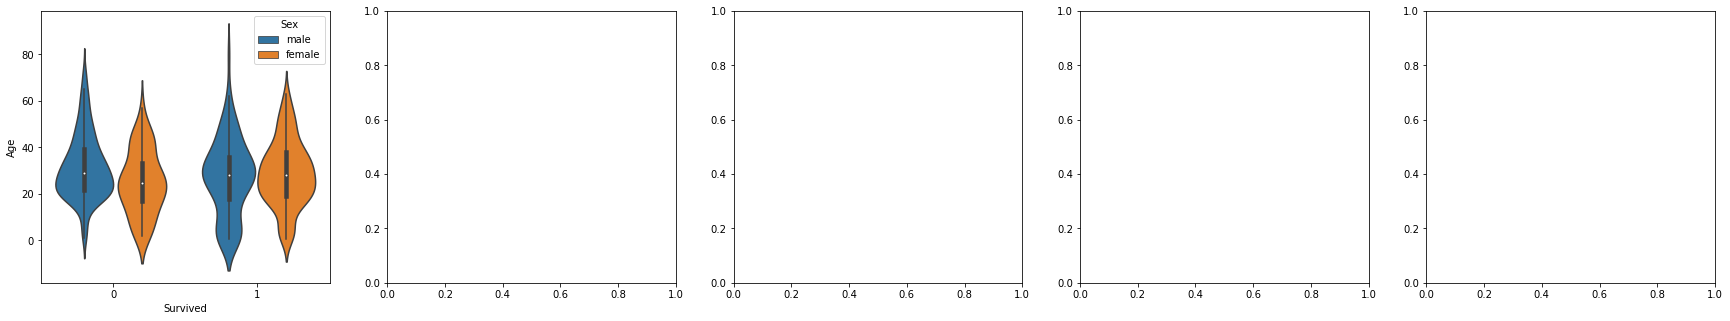

In [4]:

import pandas 
import os
import matplotlib.pyplot as mathPlot
import seaborn as sea
import difflib 
#define a class to help us with the process
class ModelFileHelper(object):
    """Ayuda a dar una descripcion de un fichero y a su carga """
    def __init__(self, csvFile):
     self.csvFile= pandas.read_csv(csvFile)
     self.fileName=csvFile
    def getDescription(self):
        return self.csvFile.describe()

    def getModelTypeDetail(self):
        """Retorna una estructura legible con los tipos de dato del conjunto de datos del csv cargado"""
        return self.__translateTypestoHumanReadable(self.csvFile.dtypes)

    def findDifferences(self, other):
        """Retorna una lista con la comparacion de las columnas y los tipos de dos csv"""
        returnlist = list (difflib.Differ().compare(self.getModelTypeDetail().to_string().splitlines(1), other.getModelTypeDetail().to_string().splitlines(1)))
        returnlist.append("Comparativa de tamaños: ")
        returnlist.append (self.fileName +  " Filas:" + ''.join(self.__tuplaCleanUp(self.csvFile.shape[0:1])) + " Columnas:" +  ''.join(self.__tuplaCleanUp(self.csvFile.shape[1:2])))
        returnlist.append (other.fileName + " Filas:" + ''.join(self.__tuplaCleanUp(other.csvFile.shape[0:1])) + " Columnas:" +  ''.join(self.__tuplaCleanUp(other.csvFile.shape[1:2])))
        return returnlist

    def __tuplaCleanUp(self, tupla):
        result = str(tupla).replace('(','').replace(')','').replace(',','')
        return result

    def __translateTypestoHumanReadable(self, text):
        return text.replace("int64", "Numero").replace("object", "Cadena de texto AlfaNumerica").replace("float64", "Numero (largo)")

#load the train model :
files = { "train" : ModelFileHelper("dataInputs/train.csv"), "test" :   ModelFileHelper("dataInputs/test.csv")} 
 
#describe both files 
print ("*****************************************************************")
print ("Análisis comparativo de tipos")
print ("*****************************************************************")
for index, (clave, valor) in enumerate (files.items()):
    print ("...............................................................")
    print ("File: " + valor.fileName)
    print (valor.getModelTypeDetail())
print ("----------------------------------------------------------------")
print ("Buscando diferencias entre tipos: - Significa eliminado, + significa añadido:")   
for listItem in enumerate (files.get("train").findDifferences(files.get("test"))):
    print (listItem)
#check for null fields:
print ("*****************************************************************")
print ("Buscando campos vacios:")   
print ("*****************************************************************")
for index, (clave, valor) in enumerate (files.items()):
    print ("...............................................................")
    print ("File: " + valor.fileName)
    valor.csvFile.info()
    print (valor.getDescription())  
fig, axs = mathPlot.subplots(ncols=5, figsize=(30,5))
sea.violinplot(x="Survived", y="Age", hue="Sex", data=files.get("train").csvFile, ax=axs[0])
 
 